# **ANÁLISIS EDA**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
import seaborn as sns

In [2]:
print(os.getcwd())
#df = pd.read_csv('C:/Users/silvi/Documents/DATA_SCIENCE/TheBridge - copia/DSPT2025-ML/Proyecto final/data/quejas-clientes.csv')
#df.head()
os.chdir(r"/content/sample_data/")
df = pd.read_csv("df.csv")
df.head()

/content


,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Retraso envío días
0,Debt collection,NI,Communication tactics,Frequent or repeated calls,TX,76119,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,0
1,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,0
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NI,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,0
3,Credit card,NI,Other,NI,CA,92592,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,0
4,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,OH,43068,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28124 entries, 0 to 28123
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product               28124 non-null  object
 1   Sub-product           28124 non-null  object
 2   Issue                 28124 non-null  object
 3   Sub-issue             28124 non-null  object
 4   State                 28124 non-null  object
 5   ZIP code              28124 non-null  int64 
 6   Date received         28124 non-null  object
 7   Date sent to company  28124 non-null  object
 8   Company               28124 non-null  object
 9   Company response      28124 non-null  object
 10  Timely response?      28124 non-null  object
 11  Retraso envío días    28124 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.6+ MB


In [4]:
#Pasar las columnas que contienen fechas a datetime

df['Date received'] = pd.to_datetime(df['Date received'])

df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

In [5]:
#Quiero saber el período de tiempo que muestra este dataframe

fecha_min = df['Date received'].min()
fecha_max = df['Date received'].max()
print(f"El período de los datos va desde {fecha_min.date()} hasta {fecha_max.date()}")

El período de los datos va desde 2015-01-01 hasta 2015-03-19


In [6]:
#CANTIDAD DE VALORES ÚNICOS POR VARIABLE

df["Product"].nunique()

11

In [7]:
df["Product"].unique()

array(['Debt collection', 'Mortgage', 'Credit card', 'Consumer loan',
       'Bank account or service', 'Payday loan', 'Credit reporting',
       'Money transfers', 'Student loan', 'Prepaid card',
       'Other financial service'], dtype=object)

In [8]:
df["Sub-product"].nunique()

43

In [9]:
df["Issue"].nunique()

89

In [10]:
df["Issue"].unique()

array(['Communication tactics', "Cont'd attempts collect debt not owed",
       'Application, originator, mortgage broker', 'Other',
       'Managing the loan or lease',
       'Taking/threatening an illegal action',
       'False statements or representation', 'Deposits and withdrawals',
       "Can't contact lender", 'Disclosure verification of debt',
       'Loan modification,collection,foreclosure',
       'Improper contact or sharing of info',
       'Problems when you are unable to pay',
       'Account opening, closing, or management',
       'Incorrect information on credit report',
       'Loan servicing, payments, escrow account',
       'Other transaction issues',
       "Credit reporting company's investigation", 'Delinquent account',
       'Late fee', 'Taking out the loan or lease',
       'Credit decision / Underwriting', 'Managing the line of credit',
       "Can't stop charges to bank account",
       "Charged fees or interest I didn't expect",
       'Improper use of 

In [11]:
df["Sub-issue"].nunique()

47

In [12]:
df["State"].nunique()

59

In [13]:
np.sort(df["State"].unique())

array(['AE', 'AK', 'AL', 'AP', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC',
       'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
       'LA', 'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT',
       'WA', 'WI', 'WV', 'WY'], dtype=object)

In [14]:
df["Company"].nunique()

1534

In [15]:
df["Company response"].nunique()

6

In [16]:
df["Company response"].unique()

array(['In progress', 'Closed with explanation',
       'Closed with non-monetary relief', 'Closed',
       'Closed with monetary relief', 'Untimely response'], dtype=object)

**GRÁFICA DE NÚMERO DE QUEJAS POR COMPAÑÍA**

In [26]:
#Gráfico para contar número de quejas por compañía
company_counts = df['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'count']

/tmp/ipython-input-1457136719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Company', data=top10_companies, palette='Set2')


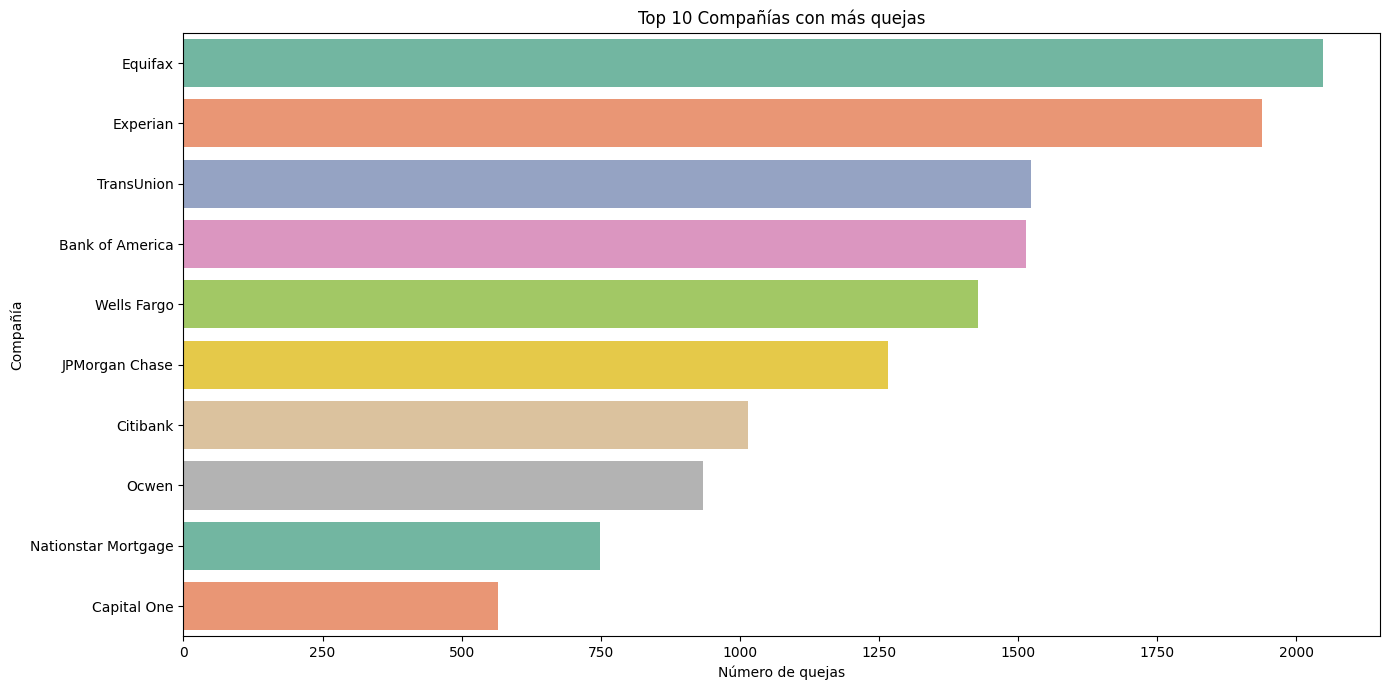

In [27]:
# Seleccionar las 10 compañías con más quejas
top10_companies = company_counts.head(10)

# Gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(x='count', y='Company', data=top10_companies, palette='Set2')

plt.title('Top 10 Compañías con más quejas')
plt.xlabel('Número de quejas')
plt.ylabel('Compañía')
plt.tight_layout()
plt.show()

In [23]:
top10_companies

,Company,count
0,Equifax,2048
1,Experian,1938
2,TransUnion,1523
3,Bank of America,1514
4,Wells Fargo,1428
5,JPMorgan Chase,1267
6,Citibank,1014
7,Ocwen,934
8,Nationstar Mortgage,749
9,Capital One,565


**GRÁFICA DE NÚMERO DE QUEJAS POR PRODUCTO**

/tmp/ipython-input-144105953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Product', data=product_counts, palette='Set2')


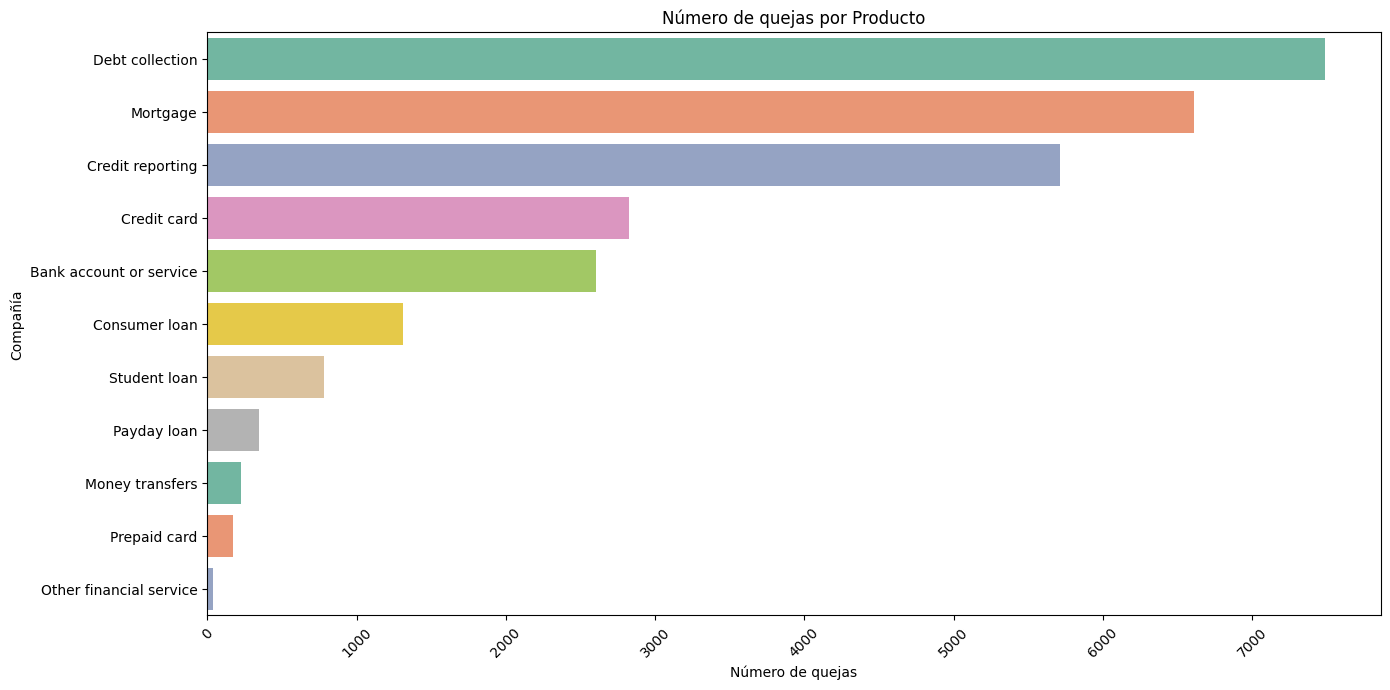

In [18]:
# Gráfico de conteo para la columna 'Producto'
plt.figure(figsize=(14, 7))
product_counts = df['Product'].value_counts().reset_index()
product_counts.columns = ['Product', 'count']
sns.barplot(x='count', y='Product', data=product_counts, palette='Set2')
plt.title('Número de quejas por Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Número de quejas')
plt.ylabel('Compañía')
plt.show()

In [22]:
product_counts

,Product,count
0,Debt collection,7486
1,Mortgage,6609
2,Credit reporting,5712
3,Credit card,2825
4,Bank account or service,2601
5,Consumer loan,1314
6,Student loan,785
7,Payday loan,348
8,Money transfers,229
9,Prepaid card,175


**GRÁFICA DE NÚMERO DE QUEJAS POR ESTADO**

In [19]:
#Contar total de quejas por State
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'total_complaints']

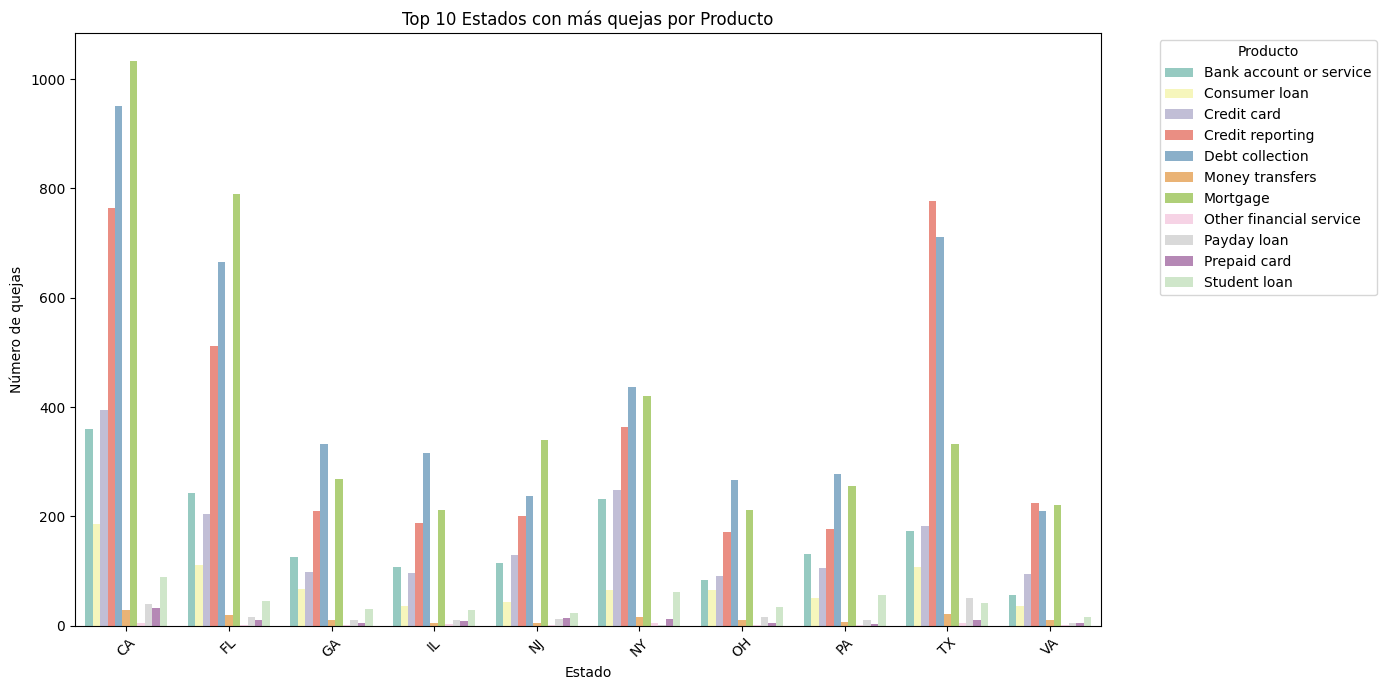

In [20]:
# Seleccionar los 10 estados con más quejas
top_states = state_counts.head(10)['State']

# Filtrar estos estados del dataframe original
df_top_states = df[df['State'].isin(top_states)]

# Contar quejas por producto y estado
complaints = df_top_states.groupby(['State', 'Product']).size().reset_index(name='count')

# Gráfico
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='count', hue='Product', data=complaints, palette='Set3')

plt.title('Top 10 Estados con más quejas por Producto')
plt.xlabel('Estado')
plt.ylabel('Número de quejas')
plt.xticks(rotation=45)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
top_states

,State
0,CA
1,FL
2,TX
3,NY
4,GA
5,NJ
6,PA
7,IL
8,OH
9,VA


**GRÁFICA DE NÚMERO DE QUEJAS POR PRODUCTO e ISSUE**

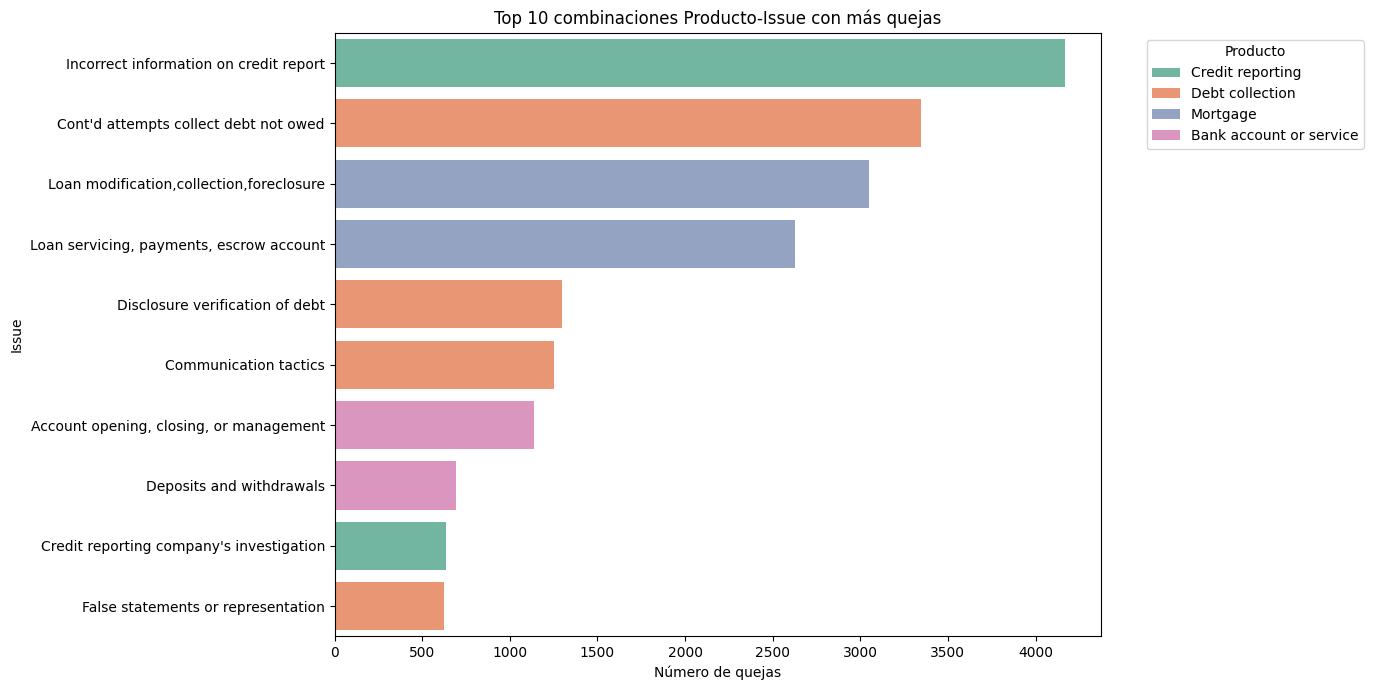

In [21]:
# Contar quejas por combinación de Product e Issue
complaints = df.groupby(['Product', 'Issue']).size().reset_index(name='count')

# Ordenar por número de quejas (descendente) y quedarnos con los 10 primeros
top10 = complaints.sort_values('count', ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(x='count', y='Issue', hue='Product', data=top10, palette='Set2')

plt.title('Top 10 combinaciones Producto-Issue con más quejas')
plt.xlabel('Número de quejas')
plt.ylabel('Issue')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
top10

,Product,Issue,count
52,Credit reporting,Incorrect information on credit report,4167
55,Debt collection,Cont'd attempts collect debt not owed,3347
68,Mortgage,"Loan modification,collection,foreclosure",3047
69,Mortgage,"Loan servicing, payments, escrow account",2627
56,Debt collection,Disclosure verification of debt,1299
54,Debt collection,Communication tactics,1251
0,Bank account or service,"Account opening, closing, or management",1138
1,Bank account or service,Deposits and withdrawals,690
50,Credit reporting,Credit reporting company's investigation,638
57,Debt collection,False statements or representation,623


**GRÁFICA DE QUEJAS RECOGIDAS POR DÍA**

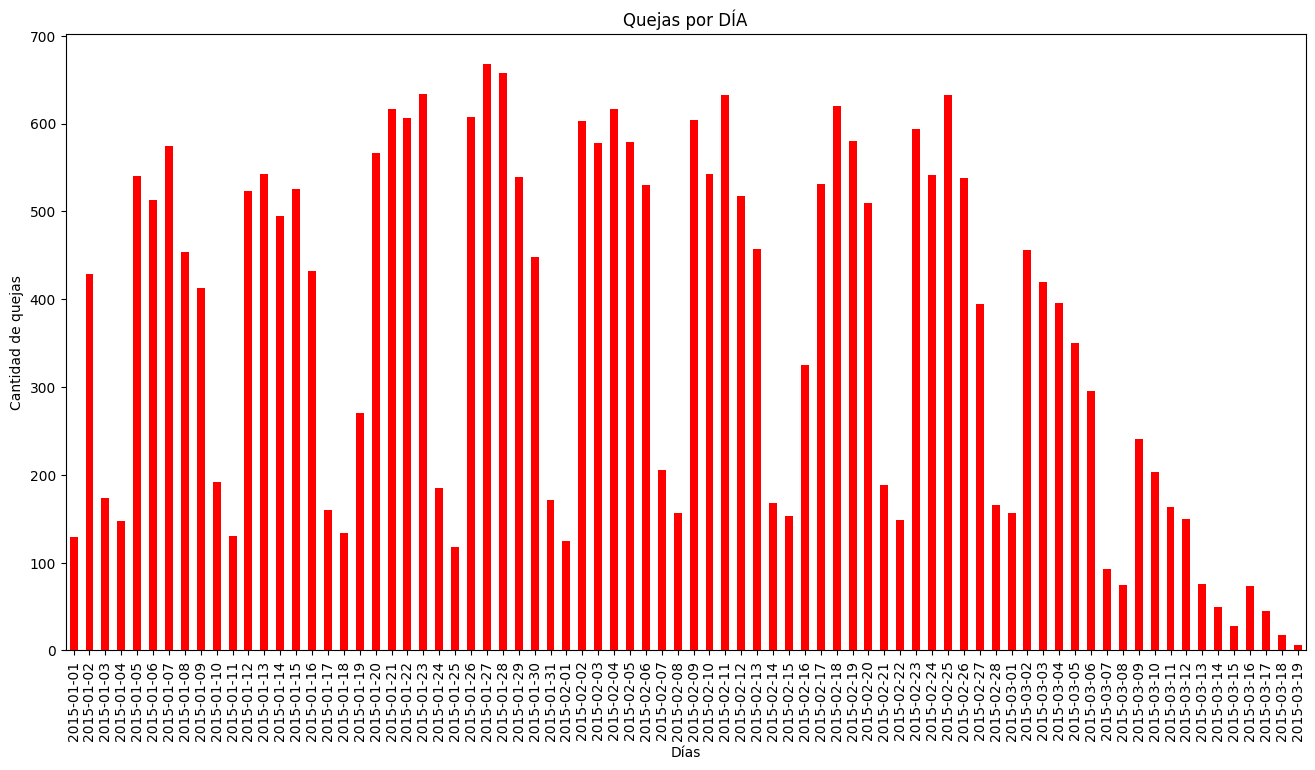

In [31]:
#Saco las quejas por día a lo largo del período de quejas 2015-01-01 hasta 2015-03-19
quejas_por_dia = df.groupby(df['Date received'].dt.date).size()
plt.figure(figsize=(16, 8))
#quejas_por_dia.plot(x="Date received",ylabel="Complaint ID",kind='bar', color='red')
quejas_por_dia.plot(kind='bar', color='red')
plt.title('Quejas por DÍA')
plt.xlabel('Días')
plt.ylabel("Cantidad de quejas")
plt.show()

**PORCENTAJE DE RESPUESTAS PROPORCIONADAS A TIEMPO POR LA COMPAÑÍA**

In [36]:
# Filtrar las filas donde la columna 'Timely response?' es 'Yes'
quejas_timely = df[df['Timely response?'] == 'Yes']

# Contar cuántas filas cumplen con la condición
numero_quejas_timely = quejas_timely.shape[0]

# Contar el total de quejas
total_quejas = df.shape[0]

# Calcular el porcentaje de quejas con respuesta oportuna
porcentaje_timely = (numero_quejas_timely / total_quejas) * 100

# Mostrar el resultado
print(f"Número de quejas con respuesta puntual (Yes): {numero_quejas_timely}")
print(f"Porcentaje de quejas con respuesta oportuna: {porcentaje_timely:.2f}%")


Número de quejas con respuesta puntual (Yes): 27412
Porcentaje de quejas con respuesta oportuna: 97.47%


**NÚMERO DE QUEJAS CON RETRASO EN EL ENVÍO DESDE QUE SE REGISTRÓ HASTA QUE SE ENVIÓ A LA COMPAÑÍA**

In [35]:
# Filtrar las filas donde 'Retraso envío días' es mayor que 0 (indica retraso)
quejas_con_retraso = df[df['Retraso envío días'] > 0]

# Contar cuántas filas cumplen con la condición de retraso
numero_quejas_retraso = quejas_con_retraso.shape[0]

# Contar el total de quejas
total_quejas = df.shape[0]

# Calcular el porcentaje de quejas con retraso en envío
porcentaje_retraso = (numero_quejas_retraso / total_quejas) * 100

# Mostrar el resultado
print(f"Número de quejas con retraso en envío: {numero_quejas_retraso}")
print(f"Porcentaje de quejas con retraso en envío: {porcentaje_retraso:.2f}%")

Número de quejas con retraso en envío: 15150
Porcentaje de quejas con retraso en envío: 53.87%


# **CONCLUSIONES DE LAS GRÁFICAS**

1. **COMPAÑÍAS CON MÁS QUEJAS**
     
- Equifax: 2048
- Experian: 1938
- TransUnion: 1523
- Bank of America: 1514
- Wells Fargo: 1428
- JPMorgan Chase: 1267
- Citibank: 1014
- Ocwen: 934
- Nationstar Mortgage: 749
- Capital One: 565

2. **PRODUCTOS CON MÁS QUEJAS**

- Debt collection: 7486
- Mortgage: 6609
- Credit reporting: 5712
- Credit card: 2825
- Bank account or service: 2601
- Consumer loan: 1314
- Student loan: 785
- Payday loan: 348
- Money transfers: 229
- Prepaid card: 175
- Other financial service: 40

3. **ESTADOS CON MÁS QUEJAS**

- CA:  California
- FL:  Florida
- TX:  Texas
- NY:  Nueva York
- GA:  Georgia
- NJ:  Nueva Jersey
- PA:  Pensilvania
- IL:  Illinois
- OH:  Ohio
- VA:  Virginia

Los estados con más quejas coinciden en su mayoría con los estados con más población en USA, algo que tiene sentido.


4. **PRODUCTOS-PROBLEMAS MÁS COMUNES**

- Credit reporting -	Incorrect information on credit report
- Debt collection	- Cont'd attempts collect debt not owed
- Mortgage -	Loan modification,collection,foreclosure
- Mortgage -	Loan servicing, payments, escrow account
- Debt collection -	Disclosure verification of debt
- Debt collection	- Communication tactics
- Bank account or service	- Account opening, closing, or management
- Bank account or service -	Deposits and withdrawals
- Credit reporting -	Credit reporting company's investigation
- Debt collection -	False statements or representation


5. **QUEJAS POR DÍA EN EL PERÍODO ANALIZADO**

Durante el período analizado, se observa que los días de fin de semana presentan una disminución notable en el número de quejas, siendo el domingo el día con mayor descenso en comparación con el sábado, algo que tiene sentido ya que en esos días no se hacen este tipo de gestiones.

6. **PORCENTAJE DE QUEJAS RESPONDIDAS A TIEMPO**

- Número de quejas con respuesta puntual (Yes): 27412
- Porcentaje de quejas con respuesta oportuna: 97.47%

7. **PORCENTAJE DE QUEJAS ENVIADAS SIN RETRASO A LA COMPAÑÍA**

- Número de quejas con retraso en envío: 15150
- Porcentaje de quejas con retraso en envío: 53.87%


